In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
%matplotlib inline

conn = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [134]:
df = pd.read_sql_query('''
    SELECT director,production_budget,domestic_gross,worldwide_gross FROM movies.rt_movie_info
join rt_imdb_link
on rt_movie_info.id = rt_imdb_link.rtid
join tn_movie_budgets
on rt_imdb_link.title = tn_movie_budgets.movie
''', conn)

OperationalError: MySQL Connection not available.

In [135]:
df

,director,production_budget,domestic_gross,worldwide_gross
0,Paul Bogart,120000000.0,56117548.0,167849187.0
1,Paul Bogart,87500000.0,154696080.0,333132750.0
2,,27000000.0,4476235.0,16566235.0
3,William Friedkin,145000000.0,68671925.0,121671925.0
4,Taylor Hackford,110000000.0,47398413.0,218853353.0
5,,60000000.0,26873932.0,71073932.0
6,George Hickenlooper,80000000.0,128200012.0,260700012.0
7,Robert Ramirez,150000000.0,206459076.0,475825484.0
8,Jake Kasdan,45000000.0,82931301.0,155931301.0
9,Lynn Shelton,150000000.0,205343774.0,359142722.0


In [136]:
df['production_budget']=df['production_budget'].str.replace(',','')
df['production_budget']=df['production_budget'].str.replace('$','')

AttributeError: Can only use .str accessor with string values!

In [137]:
df['domestic_gross']=df['domestic_gross'].str.replace(',','')
df['domestic_gross']=df['domestic_gross'].str.replace('$','')

AttributeError: Can only use .str accessor with string values!

In [138]:
df['worldwide_gross']=df['worldwide_gross'].str.replace(',','')
df['worldwide_gross']=df['worldwide_gross'].str.replace('$','')

AttributeError: Can only use .str accessor with string values!

In [139]:
df["production_budget"] = df.production_budget.astype(float)
df["domestic_gross"] = df.domestic_gross.astype(float)
df["worldwide_gross"] = df.worldwide_gross.astype(float)

In [140]:
df

,director,production_budget,domestic_gross,worldwide_gross
0,Paul Bogart,120000000.0,56117548.0,167849187.0
1,Paul Bogart,87500000.0,154696080.0,333132750.0
2,,27000000.0,4476235.0,16566235.0
3,William Friedkin,145000000.0,68671925.0,121671925.0
4,Taylor Hackford,110000000.0,47398413.0,218853353.0
5,,60000000.0,26873932.0,71073932.0
6,George Hickenlooper,80000000.0,128200012.0,260700012.0
7,Robert Ramirez,150000000.0,206459076.0,475825484.0
8,Jake Kasdan,45000000.0,82931301.0,155931301.0
9,Lynn Shelton,150000000.0,205343774.0,359142722.0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   director           28 non-null     object 
 1   production_budget  28 non-null     float64
 2   domestic_gross     28 non-null     float64
 3   worldwide_gross    28 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.0+ KB


In [142]:
gross_by_director = df.groupby('director').sum().sort_values('worldwide_gross',ascending=False)

In [143]:
gross_by_director

,production_budget,domestic_gross,worldwide_gross
director,,,
Adrian Lyne,132000000.0,234280354.0,606836535.0
Paul Bogart,207500000.0,210813628.0,500981937.0
Robert Ramirez,150000000.0,206459076.0,475825484.0
Lynn Shelton,150000000.0,205343774.0,359142722.0
,143000000.0,144357047.0,285647047.0
George Hickenlooper,80000000.0,128200012.0,260700012.0
Taylor Hackford,110000000.0,47398413.0,218853353.0
Terry Gilliam,82000000.0,158119460.0,191558505.0
Melvin Frank,142000000.0,51535741.0,178735741.0


Text(0, 0.5, 'Worldwide box office gross ($M)')

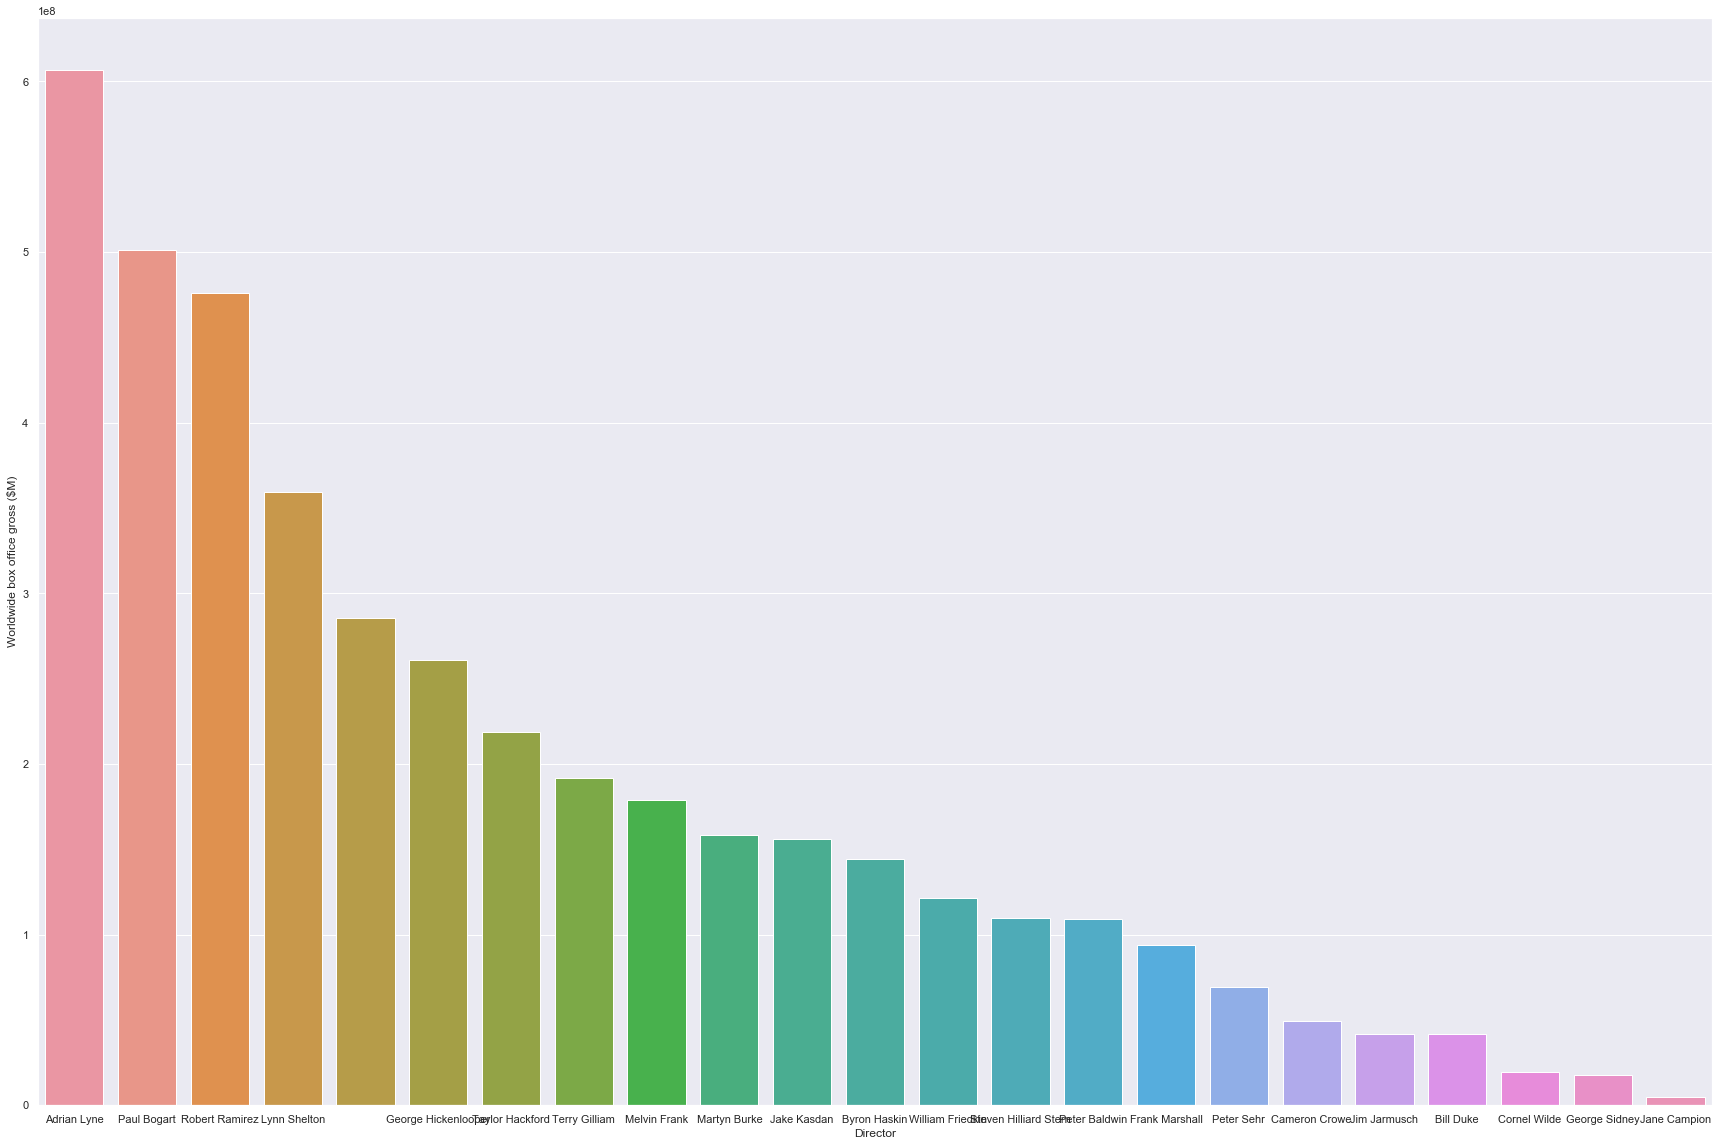

In [167]:
sns.barplot(gross_by_director.index,gross_by_director.worldwide_gross)
sns.set(rc={'figure.figsize':(30,20)})
plt.xlabel('Director')
plt.ylabel('Worldwide box office gross ($M)')

In [ ]:
df['known_for_titles'].str.split(',',n=3,expand=True)

In [ ]:
SELECT *
FROM
    movies.imdb_name_basics
join imdb_title_principals
on imdb_name_basics.nconst = imdb_title_principals.nconst

In [ ]:
SELECT *
FROM imdb_title_principals
JOIN imdb_title_crew
ON imdb_title_principals.tconst = imdb_title_crew.tconst 

In [ ]:
SELECT title,genre,director,writer,production_budget,domestic_gross,worldwide_gross FROM movies.rt_movie_info
join rt_imdb_link
on rt_movie_info.id = rt_imdb_link.rtid
join tn_movie_budgets
on rt_imdb_link.title = tn_movie_budgets.movie

In [215]:
df2=pd.read_sql('''Select primary_name,primary_profession,movie,production_budget,domestic_gross,worldwide_gross
From movies.imdb_title_crew
join imdb_name_basics
on imdb_name_basics.nconst = imdb_title_crew.directors
join imdb_title_basics
on imdb_title_basics.tconst = imdb_title_crew.tconst
join tn_movie_budgets
on imdb_title_basics.primary_title=tn_movie_budgets.movie
where primary_profession like "%director%"''',conn)

In [232]:
type('worldwide_gross')

str

In [238]:
df2['worldwide_gross']=df2['worldwide_gross'].str.replace(',','')
df2['worldwide_gross']=df2['worldwide_gross'].str.replace('$','')
df2['worldwide_gross'] = df2.worldwide_gross.astype(float)

In [243]:
g=df2[['primary_name','worldwide_gross']]

In [244]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_name     3168 non-null   object 
 1   worldwide_gross  3168 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.6+ KB


In [260]:
gbd = g.groupby('primary_name').sum().sort_values('worldwide_gross',ascending=False).head(20)

In [261]:
gbd

,worldwide_gross
primary_name,
Christopher Nolan,3.086180e+09
James Wan,3.083488e+09
Joss Whedon,2.992085e+09
Peter Jackson,2.922948e+09
Michael Bay,2.911998e+09
Atsushi Wada,2.776345e+09
Francis Lawrence,2.543192e+09
Zack Snyder,2.420920e+09
Bryan Singer,2.383073e+09


Text(0.5, 1.0, 'Top 20 Most Successful Directors')

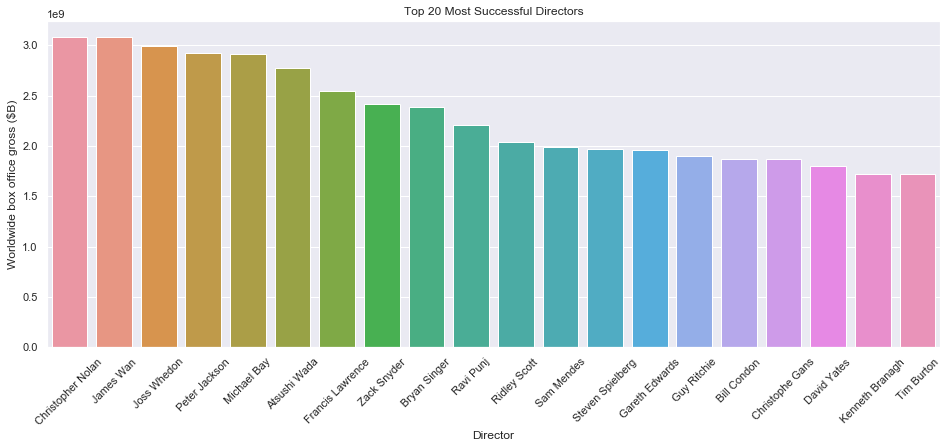

In [297]:
plt.figure(figsize=(16, 6))
sns.barplot(gbd.index,gbd.worldwide_gross)
plt.xlabel('Director')
plt.ylabel('Worldwide box office gross ($B)')
plt.xticks(rotation=45)
plt.title('Top 20 Most Successful Directors')

In [216]:
new = df2['primary_profession'].str.split(',',n=3,expand=True)

In [196]:
df2['Primary Profession'] = new[0] 
df2['Secondary Profession'] = new[1] 
df2['Tertiary Profession'] = new[2] 

In [197]:
df2

,primary_name,primary_profession,movie,production_budget,domestic_gross,worldwide_gross,Profession,Primary Profession,Secondary Profession,Tertiary Profession
0,Atsushi Wada,director,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",director,director,None,None
1,Rob Marshall,"director,miscellaneous,producer",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",director,director,miscellaneous,producer
2,Simon Kinberg,"producer,writer,director",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",producer,producer,writer,director
3,Joss Whedon,"writer,producer,director",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",writer,writer,producer,director
4,Zack Snyder,"producer,director,writer",Justice League,"$300,000,000","$229,024,295","$655,945,209",producer,producer,director,writer
...,...,...,...,...,...,...,...,...,...,...
3462,Graham Wright,"soundtrack,director,actor",Clean,"$10,000","$138,711","$138,711",soundtrack,soundtrack,director,actor
3463,Bill Yip,"assistant_director,producer,actor",Cure,"$10,000","$94,596","$94,596",assistant_director,assistant_director,producer,actor
3464,Ifigeneia Dimitriou,director,Cure,"$10,000","$94,596","$94,596",director,director,None,None
3465,Edward Burns,"actor,writer,producer",Newlyweds,"$9,000","$4,584","$4,584",actor,actor,writer,producer
